<a href="https://colab.research.google.com/github/robertosgpontes/osem/blob/main/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Formulação Geral do Problema

O problema apresentado pode ser formulado através de uma

\begin{equation}
	\max  \sum_{i=1}^{n}{[A_{i}^1-(A_{i}^2-A_{i}^3)]X_i} = \max \sum_{i=1}^{n}{C_{i}^1X_i}
\end{equation}
e
\begin{equation}
\min \sum_{i=1}^{n}{C_{i}^2X_i}
\end{equation}


Sujeito a
\begin{equation}
x_1 \leq b_1
\end{equation}
\begin{equation}
x_2 \leq b_2
\end{equation}
\begin{equation}
x_3 \leq b_3
\end{equation}
\begin{equation}
x_1 + x_3 \leq b_4
\end{equation}
\begin{equation}
x_1 + x_2 + x_3 + x_4 = b_5
\end{equation}
\begin{equation}
x_1 \geq b_6
\end{equation}
\begin{equation}
x_2 \geq b_7
\end{equation}
\begin{equation}
x_1, x_2, x_3, x_4 \geq 0
\end{equation}


# Methodology

https://www.supplychaindataanalytics.com/multi-objective-linear-optimization-with-pulp-in-python/

https://pythonhealthcare.org/tag/pareto-front/



### Approach 1: Solution with Hierarchical Methodology

Maximizing for one objective, then adding it as a constraint and solving for the other objective

#### 1.1. First Step

\begin{equation}
S_1 = \max \sum_{i=1}^{n}{C_{i}^1X_i}
\end{equation}

Sujeito a
\begin{equation}
x_1 \leq b_1
\end{equation}
\begin{equation}
x_2 \leq b_2
\end{equation}
\begin{equation}
x_3 \leq b_3
\end{equation}
\begin{equation}
x_1 + x_3 \leq b_4
\end{equation}
\begin{equation}
x_1 + x_2 + x_3 + x_4 = b_5
\end{equation}
\begin{equation}
x_1 \geq b_6
\end{equation}
\begin{equation}
x_2 \geq b_7
\end{equation}
\begin{equation}
x_1, x_2, x_3, x_4 \geq 0
\end{equation}

#### 1.2. Second Step


\begin{equation}
\min \sum_{i=1}^{n}{C_{i}^2X_i}
\end{equation}
Sujeito a
\begin{equation}
x_1 \leq b_1
\end{equation}
\begin{equation}
x_2 \leq b_2
\end{equation}
\begin{equation}
x_3 \leq b_3
\end{equation}
\begin{equation}
x_1 + x_3 \leq b_4
\end{equation}
\begin{equation}
x_1 + x_2 + x_3 + x_4 = b_5
\end{equation}
\begin{equation}
x_1 \geq b_6
\end{equation}
\begin{equation}
x_2 \geq b_7
\end{equation}
\begin{equation}
\max \sum_{i=1}^{n}{C_{i}^1X_i} \geq S_1
\end{equation}
\begin{equation}
x_1, x_2, x_3, x_4 \geq 0
\end{equation}


## Approach 2: Solution with ...

\begin{equation}
	\max  \alpha\sum_{i=1}^{n}{[A_{i}^1-(A_{i}^2-A_{i}^3)]X_i} - (1-\alpha)\sum_{i=1}^{n}{C_iX_i}
\end{equation}

Sujeito a
\begin{equation}
x_1 \leq b_1
\end{equation}
\begin{equation}
x_2 \leq b_2
\end{equation}
\begin{equation}
x_3 \leq b_3
\end{equation}
\begin{equation}
x_1 + x_3 \leq b_4
\end{equation}
\begin{equation}
x_1 + x_2 + x_3 + x_4 = b_5
\end{equation}
\begin{equation}
x_1 \geq b_6
\end{equation}
\begin{equation}
x_2 \geq b_7
\end{equation}
\begin{equation}
x_1, x_2, x_3, x_4 \geq 0
\end{equation}

# General Definitions

## Language

In [35]:
% pip install pulp
!rm /content/utils.py
!wget https://raw.githubusercontent.com/robertosgpontes/osem/main/utils.py
%run /content/utils.py

--2021-08-21 19:39:28--  https://raw.githubusercontent.com/robertosgpontes/osem/main/utils.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2120 (2.1K) [text/plain]
Saving to: ‘utils.py’

utils.py            100%[===================>]   2.07K  --.-KB/s    in 0s      

2021-08-21 19:39:28 (34.8 MB/s) - ‘utils.py’ saved [2120/2120]



<Figure size 432x288 with 0 Axes>

In [36]:
# Python libraries used to solve the problem Linear Programing
import pulp
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

## Problem Solution

In [37]:
NUM_ITER = 1000

# Solution

##Paper 1 (P1): Optimizing the Management of Soil Erosion

Nikkami, Davood & Elektorowicz, Maria & MEHUYS, GUY. (2002). Optimizing the Management of Soil Erosion. Water Quality Research Journal in Canada. 37. 10.2166/wqrj.2002.038. 

### Model Parameter

In [38]:
# Variáveis do modelo

C = np.array([[10.54394,  0.0469 ,  0.59679,  0.02194],
              [1.41, 4.99, 2.41, 6.24]])

A = np.array([  [1, 0, 0, 0],
                [0, 0, 1, 0],
                [0, 0, 0, 1],
                [1, 0, 1, 0],
                [1, 1, 1, 1],
                [1, 0, 0, 0],
                [0, 1, 0, 0]])

b = np.array([[557],[1143],[1577],[1700],[10310],[160],[6990]])

### Solution


#### Approach 1

##### Step 1

In [39]:
linearProblem = pulp.LpProblem("First_Objective_Max",pulp.LpMaximize)

X = create_x_variables()

linearProblem += f(C[0], X)

linearProblem = load_model(linearProblem, A, X, b)

solution = linearProblem.solve()

In [40]:
print_solution(solution, linearProblem, X)


Status = Optimal
Value = 6958.9145499999995
x1 = 557.0
x2 = 8610.0
x3 = 1143.0
x4 = 0.0


In [41]:
f1_max = pulp.value(linearProblem.objective)

##### Step 2

In [42]:
linearProblem = pulp.LpProblem("Second_Objective_Min",pulp.LpMinimize)

X = create_x_variables()

linearProblem += f(C[1], X)

linearProblem = load_model(linearProblem, A, X, b)

linearProblem += f(C[0], X) >= f1_max

solution = linearProblem.solve()

In [43]:
print_solution(solution, linearProblem, X)


Status = Optimal
Value = 46503.9
x1 = 557.0
x2 = 8610.0
x3 = 1143.0
x4 = 0.0


#### Approach 2

In [44]:
CMinMax = MinMax(C)
CStandardization = Standardization(C)

In [45]:
alpha_lin = np.linspace(0, 1, NUM_ITER)

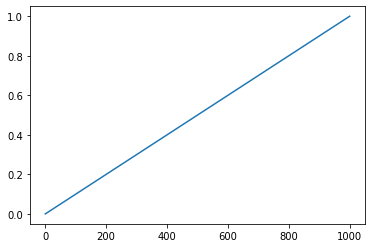

In [46]:
plt.plot(np.linspace(0, NUM_ITER, NUM_ITER), alpha_lin)

In [47]:
df_solution_lin = run_models(alpha_lin, C, A, b)

In [48]:
df_solution_lin

,iter,alpha,status,x1,x2,x3,x4,obj_value,f1,f2
0,0,0.000000,Optimal,557.0,8610.0,1143.0,0.0,-46503.900000,6958.91455,-46503.9
1,1,0.001001,Optimal,557.0,8610.0,1143.0,0.0,-46450.383669,6958.91455,-46503.9
2,2,0.002002,Optimal,557.0,8610.0,1143.0,0.0,-46396.867338,6958.91455,-46503.9
3,3,0.003003,Optimal,557.0,8610.0,1143.0,0.0,-46343.351007,6958.91455,-46503.9
4,4,0.004004,Optimal,557.0,8610.0,1143.0,0.0,-46289.834676,6958.91455,-46503.9
...,...,...,...,...,...,...,...,...,...,...
995,995,0.995996,Optimal,557.0,8610.0,1143.0,0.0,6744.849226,6958.91455,-46503.9
996,996,0.996997,Optimal,557.0,8610.0,1143.0,0.0,6798.365557,6958.91455,-46503.9
997,997,0.997998,Optimal,557.0,8610.0,1143.0,0.0,6851.881888,6958.91455,-46503.9
998,998,0.998999,Optimal,557.0,8610.0,1143.0,0.0,6905.398219,6958.91455,-46503.9


In [49]:
alpha_sig_004 = sig(-0.004, NUM_ITER)

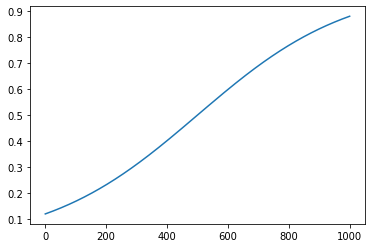

In [50]:
plt.plot(np.linspace(0, NUM_ITER, NUM_ITER), alpha_sig_004)

In [51]:
df_solution_sig_004 = run_models(alpha_sig_004, C, A, b)

In [52]:
df_solution_sig_004

,iter,alpha,status,x1,x2,x3,x4,obj_value,f1,f2
0,0,0.119203,Optimal,557.0,8610.0,1143.0,0.0,-40130.976286,6958.91455,-46503.9
1,1,0.119624,Optimal,557.0,8610.0,1143.0,0.0,-40108.466509,6958.91455,-46503.9
2,2,0.120046,Optimal,557.0,8610.0,1143.0,0.0,-40085.888062,6958.91455,-46503.9
3,3,0.120470,Optimal,557.0,8610.0,1143.0,0.0,-40063.240812,6958.91455,-46503.9
4,4,0.120895,Optimal,557.0,8610.0,1143.0,0.0,-40040.524625,6958.91455,-46503.9
...,...,...,...,...,...,...,...,...,...,...
995,995,0.879105,Optimal,557.0,8610.0,1143.0,0.0,495.539175,6958.91455,-46503.9
996,996,0.879530,Optimal,557.0,8610.0,1143.0,0.0,518.255362,6958.91455,-46503.9
997,997,0.879954,Optimal,557.0,8610.0,1143.0,0.0,540.902612,6958.91455,-46503.9
998,998,0.880376,Optimal,557.0,8610.0,1143.0,0.0,563.481059,6958.91455,-46503.9


In [53]:
alpha_sig_06 = sig(-0.06, NUM_ITER)

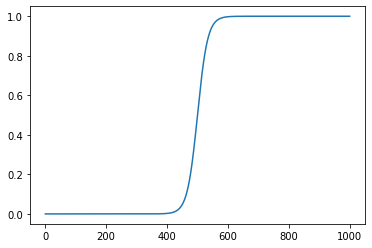

In [54]:
plt.plot(np.linspace(0, NUM_ITER, NUM_ITER), alpha_sig_06)

In [55]:
df_solution_sig_06 = run_models(alpha_sig_06, C, A, b)

In [56]:
df_solution_sig_06

,iter,alpha,status,x1,x2,x3,x4,obj_value,f1,f2
0,0,9.357623e-14,Optimal,557.0,8610.0,1143.0,0.0,-46503.90000,6958.91455,-46503.9
1,1,9.936863e-14,Optimal,557.0,8610.0,1143.0,0.0,-46503.90000,6958.91455,-46503.9
2,2,1.055196e-13,Optimal,557.0,8610.0,1143.0,0.0,-46503.90000,6958.91455,-46503.9
3,3,1.120513e-13,Optimal,557.0,8610.0,1143.0,0.0,-46503.90000,6958.91455,-46503.9
4,4,1.189873e-13,Optimal,557.0,8610.0,1143.0,0.0,-46503.90000,6958.91455,-46503.9
...,...,...,...,...,...,...,...,...,...,...
995,995,1.000000e+00,Optimal,557.0,8610.0,1143.0,0.0,6958.91455,6958.91455,-46503.9
996,996,1.000000e+00,Optimal,557.0,8610.0,1143.0,0.0,6958.91455,6958.91455,-46503.9
997,997,1.000000e+00,Optimal,557.0,8610.0,1143.0,0.0,6958.91455,6958.91455,-46503.9
998,998,1.000000e+00,Optimal,557.0,8610.0,1143.0,0.0,6958.91455,6958.91455,-46503.9


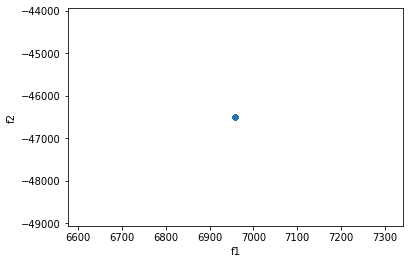

In [57]:
df_solution_sig_06.plot.scatter(x='f1', y='f2')

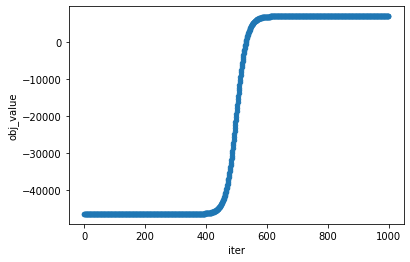

In [58]:
df_solution_sig_06.plot.scatter(x='iter', y='obj_value')

##Paper 2 (P2): Land Use Scenarios and Optimization in a Watershed.

D. Nikkami, M. Shabani and H. Ahmadi, 2009. Land Use Scenarios and Optimization in a Watershed. Journal of Applied Sciences, 9: 287-295. DOI: 10.3923/jas.2009.287.295

### Model Parameter

In [59]:
# Variáveis do modelo

C = np.array([[21.452,  0.101 ,  4.56,  1.013],
              [8.77, 10.47, 12.57, 10.81]])

A = np.array([  [1, 0, 0, 0],
                [0, 0, 1, 0],
                [0, 0, 0, 1],
                [1, 0, 1, 0],
                [1, 1, 1, 1],
                [1, 0, 0, 0],
                [0, 1, 0, 0]])

b = np.array([[2115],[237],[207],[2352],[13032],[561],[10550]])

### Solution


#### Approach 1

##### Step 1

In [60]:
linearProblem = pulp.LpProblem("First_Objective_Max",pulp.LpMaximize)

X = create_x_variables()

linearProblem += f(C[0], X)

linearProblem = load_model(linearProblem, A, X, b)

solution = linearProblem.solve()

In [61]:
print_solution(solution, linearProblem, X)


Status = Optimal
Value = 47648.94000000001
x1 = 2115.0
x2 = 10550.0
x3 = 237.0
x4 = 130.0


In [62]:
f1_max = pulp.value(linearProblem.objective)

##### Step 2

In [63]:
linearProblem = pulp.LpProblem("Second_Objective_Min",pulp.LpMinimize)

X = create_x_variables()

linearProblem += f(C[1], X)

linearProblem = load_model(linearProblem, A, X, b)

linearProblem += f(C[0], X) >= f1_max

solution = linearProblem.solve()

In [64]:
print_solution(solution, linearProblem, X)


Status = Optimal
Value = 133391.44
x1 = 2115.0
x2 = 10550.0
x3 = 237.0
x4 = 130.0


#### Approach 2

In [65]:
CMinMax = MinMax(C)
CStandardization = Standardization(C)

In [66]:
alpha_lin = np.linspace(0, 1, NUM_ITER)

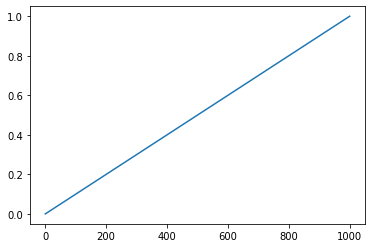

In [67]:
plt.plot(np.linspace(0, NUM_ITER, NUM_ITER), alpha_lin)

In [68]:
df_solution_lin = run_models(alpha_lin, C, A, b)

In [69]:
df_solution_lin

,iter,alpha,status,x1,x2,x3,x4,obj_value,f1,f2
0,0,0.000000,Optimal,2115.0,10917.0,0.0,0.0,-132849.540000,46473.597,-132849.54
1,1,0.001001,Optimal,2115.0,10917.0,0.0,0.0,-132670.037360,46473.597,-132849.54
2,2,0.002002,Optimal,2115.0,10917.0,0.0,0.0,-132490.534721,46473.597,-132849.54
3,3,0.003003,Optimal,2115.0,10917.0,0.0,0.0,-132311.032081,46473.597,-132849.54
4,4,0.004004,Optimal,2115.0,10917.0,0.0,0.0,-132131.529441,46473.597,-132849.54
...,...,...,...,...,...,...,...,...,...,...
995,995,0.995996,Optimal,2115.0,10550.0,237.0,130.0,46924.053594,47648.940,-133391.44
996,996,0.996997,Optimal,2115.0,10550.0,237.0,130.0,47105.275195,47648.940,-133391.44
997,997,0.997998,Optimal,2115.0,10550.0,237.0,130.0,47286.496797,47648.940,-133391.44
998,998,0.998999,Optimal,2115.0,10550.0,237.0,130.0,47467.718398,47648.940,-133391.44


In [70]:
alpha_sig_004 = sig(-0.004, NUM_ITER)

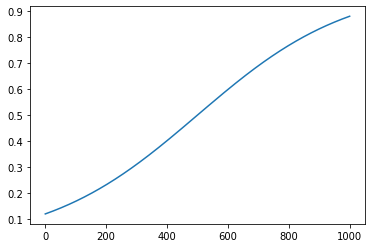

In [71]:
plt.plot(np.linspace(0, NUM_ITER, NUM_ITER), alpha_sig_004)

In [72]:
df_solution_sig_004 = run_models(alpha_sig_004, C, A, b)

In [73]:
df_solution_sig_004

,iter,alpha,status,x1,x2,x3,x4,obj_value,f1,f2
0,0,0.119203,Optimal,2115.0,10917.0,0.0,0.0,-111473.698083,46473.597,-132849.54
1,1,0.119624,Optimal,2115.0,10917.0,0.0,0.0,-111398.196563,46473.597,-132849.54
2,2,0.120046,Optimal,2115.0,10917.0,0.0,0.0,-111322.464711,46473.597,-132849.54
3,3,0.120470,Optimal,2115.0,10917.0,0.0,0.0,-111246.502080,46473.597,-132849.54
4,4,0.120895,Optimal,2115.0,10917.0,0.0,0.0,-111170.308227,46473.597,-132849.54
...,...,...,...,...,...,...,...,...,...,...
995,995,0.879105,Optimal,2115.0,10550.0,237.0,130.0,25762.102507,47648.940,-133391.44
996,996,0.879530,Optimal,2115.0,10550.0,237.0,130.0,25839.026012,47648.940,-133391.44
997,997,0.879954,Optimal,2115.0,10550.0,237.0,130.0,25915.716079,47648.940,-133391.44
998,998,0.880376,Optimal,2115.0,10550.0,237.0,130.0,25992.173158,47648.940,-133391.44


In [74]:
alpha_sig_06 = sig(-0.06, NUM_ITER)

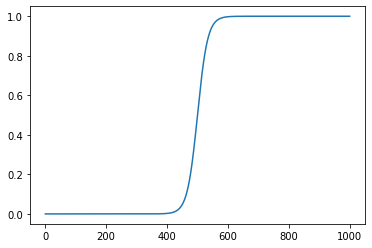

In [75]:
plt.plot(np.linspace(0, NUM_ITER, NUM_ITER), alpha_sig_06)

In [76]:
df_solution_sig_06 = run_models(alpha_sig_06, C, A, b)

In [77]:
df_solution_sig_06

,iter,alpha,status,x1,x2,x3,x4,obj_value,f1,f2
0,0,9.357623e-14,Optimal,2115.0,10917.0,0.0,0.0,-132849.54,46473.597,-132849.54
1,1,9.936863e-14,Optimal,2115.0,10917.0,0.0,0.0,-132849.54,46473.597,-132849.54
2,2,1.055196e-13,Optimal,2115.0,10917.0,0.0,0.0,-132849.54,46473.597,-132849.54
3,3,1.120513e-13,Optimal,2115.0,10917.0,0.0,0.0,-132849.54,46473.597,-132849.54
4,4,1.189873e-13,Optimal,2115.0,10917.0,0.0,0.0,-132849.54,46473.597,-132849.54
...,...,...,...,...,...,...,...,...,...,...
995,995,1.000000e+00,Optimal,2115.0,10550.0,237.0,130.0,47648.94,47648.940,-133391.44
996,996,1.000000e+00,Optimal,2115.0,10550.0,237.0,130.0,47648.94,47648.940,-133391.44
997,997,1.000000e+00,Optimal,2115.0,10550.0,237.0,130.0,47648.94,47648.940,-133391.44
998,998,1.000000e+00,Optimal,2115.0,10550.0,237.0,130.0,47648.94,47648.940,-133391.44


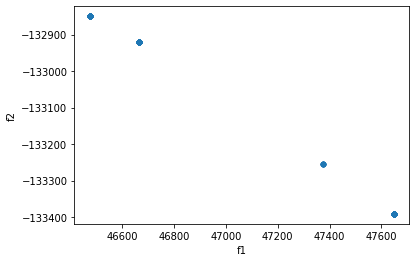

In [81]:
df_solution_lin.plot.scatter(x='f1', y='f2')

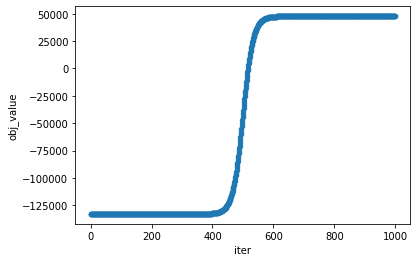

In [82]:
df_solution_sig_06.plot.scatter(x='iter', y='obj_value')

##Paper 3 (P3): Land use optimization in watershed scale

Sadeghi, Seyed Hamidreza & Jalili, Khalil & Nikkami, Davood. (2009). Land use optimization in watershed scale. Land Use Policy. 26. 186-193. 10.1016/j.landusepol.2008.02.007. 

### Model Parameter

In [ ]:
# Variáveis do modelo

C = np.array([[8.5042,  0.1562 ,  4.8758,  0.3215],
              [7.389, 8.144, 7.389, 21.112]])

A = np.array([  [1, 0, 0, 0],
                [0, 0, 1, 0],
                [0, 0, 0, 1],
                [1, 0, 1, 0],
                [1, 1, 1, 1],
                [1, 0, 0, 0],
                [0, 1, 0, 0]])

b = np.array([[2115],[237],[207],[2352],[13032],[561],[10550]])

### Solution


#### Approach 1

##### Step 1

In [ ]:
linearProblem = pulp.LpProblem("First_Objective_Max",pulp.LpMaximize)

X = create_x_variables()

linearProblem += f(C[0], X)

linearProblem = load_model(linearProblem, A, X, b)

solution = linearProblem.solve()

In [ ]:
print_solution(solution, linearProblem, X)


Status = Optimal
Value = 47648.94000000001
x1 = 2115.0
x2 = 10550.0
x3 = 237.0
x4 = 130.0


In [ ]:
f1_max = pulp.value(linearProblem.objective)

##### Step 2

In [ ]:
linearProblem = pulp.LpProblem("Second_Objective_Min",pulp.LpMinimize)

X = create_x_variables()

linearProblem += f(C[1], X)

linearProblem = load_model(linearProblem, A, X, b)

linearProblem += f(C[0], X) >= f1_max

solution = linearProblem.solve()

In [ ]:
print_solution(solution, linearProblem, X)


Status = Optimal
Value = 133391.44
x1 = 2115.0
x2 = 10550.0
x3 = 237.0
x4 = 130.0


#### Approach 2

In [ ]:
CMinMax = MinMax(C)
CStandardization = Standardization(C)

In [ ]:
alpha_lin = np.linspace(0, 1, NUM_ITER)

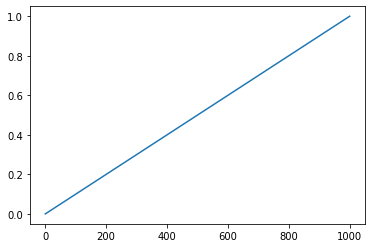

In [ ]:
plt.plot(np.linspace(0, NUM_ITER, NUM_ITER), alpha_lin)

In [ ]:
df_solution_lin = run_models(alpha_lin, C, A, b)

In [ ]:
df_solution_lin

,iter,alpha,status,x1,x2,x3,x4,obj_value,f1,f2
0,0,0.000000,Optimal,2115.0,10917.0,0.0,0.0,-132849.540000,46473.597,-132849.54
1,1,0.001001,Optimal,2115.0,10917.0,0.0,0.0,-132670.037360,46473.597,-132849.54
2,2,0.002002,Optimal,2115.0,10917.0,0.0,0.0,-132490.534721,46473.597,-132849.54
3,3,0.003003,Optimal,2115.0,10917.0,0.0,0.0,-132311.032081,46473.597,-132849.54
4,4,0.004004,Optimal,2115.0,10917.0,0.0,0.0,-132131.529441,46473.597,-132849.54
...,...,...,...,...,...,...,...,...,...,...
995,995,0.995996,Optimal,2115.0,10550.0,237.0,130.0,46924.053594,47648.940,-133391.44
996,996,0.996997,Optimal,2115.0,10550.0,237.0,130.0,47105.275195,47648.940,-133391.44
997,997,0.997998,Optimal,2115.0,10550.0,237.0,130.0,47286.496797,47648.940,-133391.44
998,998,0.998999,Optimal,2115.0,10550.0,237.0,130.0,47467.718398,47648.940,-133391.44


In [ ]:
alpha_sig_004 = sig(-0.004, NUM_ITER)

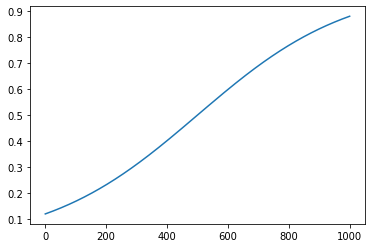

In [ ]:
plt.plot(np.linspace(0, NUM_ITER, NUM_ITER), alpha_sig_004)

In [ ]:
df_solution_sig_004 = run_models(alpha_sig_004, C, A, b)

In [ ]:
df_solution_sig_004

,iter,alpha,status,x1,x2,x3,x4,obj_value,f1,f2
0,0,0.119203,Optimal,2115.0,10917.0,0.0,0.0,-111473.698083,46473.597,-132849.54
1,1,0.119624,Optimal,2115.0,10917.0,0.0,0.0,-111398.196563,46473.597,-132849.54
2,2,0.120046,Optimal,2115.0,10917.0,0.0,0.0,-111322.464711,46473.597,-132849.54
3,3,0.120470,Optimal,2115.0,10917.0,0.0,0.0,-111246.502080,46473.597,-132849.54
4,4,0.120895,Optimal,2115.0,10917.0,0.0,0.0,-111170.308227,46473.597,-132849.54
...,...,...,...,...,...,...,...,...,...,...
995,995,0.879105,Optimal,2115.0,10550.0,237.0,130.0,25762.102507,47648.940,-133391.44
996,996,0.879530,Optimal,2115.0,10550.0,237.0,130.0,25839.026012,47648.940,-133391.44
997,997,0.879954,Optimal,2115.0,10550.0,237.0,130.0,25915.716079,47648.940,-133391.44
998,998,0.880376,Optimal,2115.0,10550.0,237.0,130.0,25992.173158,47648.940,-133391.44


In [ ]:
alpha_sig_06 = sig(-0.06, NUM_ITER)

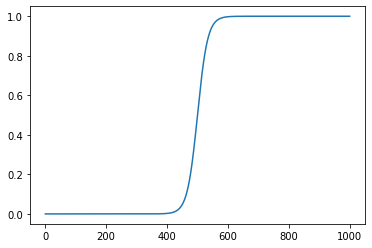

In [ ]:
plt.plot(np.linspace(0, NUM_ITER, NUM_ITER), alpha_sig_06)

In [ ]:
df_solution_sig_06 = run_models(alpha_sig_06, C, A, b)

In [ ]:
df_solution_sig_06

,iter,alpha,status,x1,x2,x3,x4,obj_value,f1,f2
0,0,9.357623e-14,Optimal,2115.0,10917.0,0.0,0.0,-132849.54,46473.597,-132849.54
1,1,9.936863e-14,Optimal,2115.0,10917.0,0.0,0.0,-132849.54,46473.597,-132849.54
2,2,1.055196e-13,Optimal,2115.0,10917.0,0.0,0.0,-132849.54,46473.597,-132849.54
3,3,1.120513e-13,Optimal,2115.0,10917.0,0.0,0.0,-132849.54,46473.597,-132849.54
4,4,1.189873e-13,Optimal,2115.0,10917.0,0.0,0.0,-132849.54,46473.597,-132849.54
...,...,...,...,...,...,...,...,...,...,...
995,995,1.000000e+00,Optimal,2115.0,10550.0,237.0,130.0,47648.94,47648.940,-133391.44
996,996,1.000000e+00,Optimal,2115.0,10550.0,237.0,130.0,47648.94,47648.940,-133391.44
997,997,1.000000e+00,Optimal,2115.0,10550.0,237.0,130.0,47648.94,47648.940,-133391.44
998,998,1.000000e+00,Optimal,2115.0,10550.0,237.0,130.0,47648.94,47648.940,-133391.44


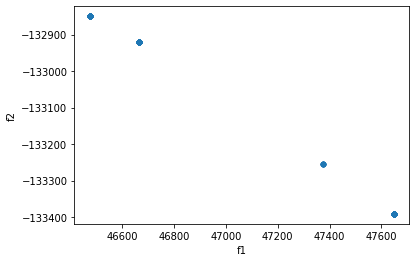

In [ ]:
df_solution_lin.plot.scatter(x='f1', y='f2')

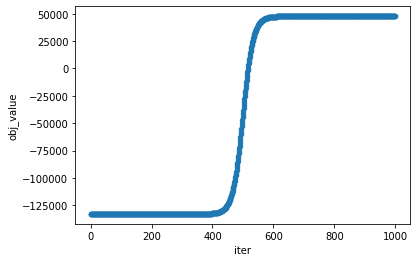

In [ ]:
df_solution_sig_06.plot.scatter(x='iter', y='obj_value')